# let's see what we can graph/plot from our homeless campsites data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
print("Libraries imported!")

# --- INPUT PATHS (edit as needed) ---
orig_path  = Path("C:/Users/Steph/local/OIT-class/project-files/datasets/processed/IRP_Campsite_Reports_latlong-hood-zips-2024.csv")  # many rows; we'll count by neighborhood
df_orig = pd.read_csv(orig_path, dtype=str, engine="python")

df = df_orig.copy()
df.columns = df.columns.str.strip()


Libraries imported!


In [2]:
df.head()

,X,Y,OBJECTID,inc_date_create,inc_id,duplicate,item_date_create,IS_VEHICLE,report_id,latitude,longitude,zip_code,NAME,year,month
0,-13654252.7079,5704679.3289,54527,2024/12/31 23:58:04+00,24-117976,0,20241231154906,Yes,649033,45.52578779979394,-122.65823900736933,97232,Kerns,2024,12
1,-13654692.5194,5701901.3299,54529,2024/12/31 23:48:04+00,24-117974,0,20241231154115,No,649026,45.508301772258385,-122.66218990129516,97214,Hosford-Abernethy,2024,12
2,-13654711.6286,5702644.2023,54530,2024/12/31 23:48:04+00,24-117973,0,20241231153619,No,649022,45.512978291513164,-122.6623615621594,97214,Buckman,2024,12
3,-13662522.7434,5709217.2637,54532,2024/12/31 23:48:04+00,24-117971,0,20241231153057,Yes,649014,45.55434000030589,-122.73253000026793,97210,Mc Unclaimed #14,2024,12
4,-13641977.0731,5709682.8785,54538,2024/12/31 23:38:04+00,24-117965,0,20241231152247,Yes,649000,45.557268778673695,-122.54796510373825,97220,Parkrose,2024,12


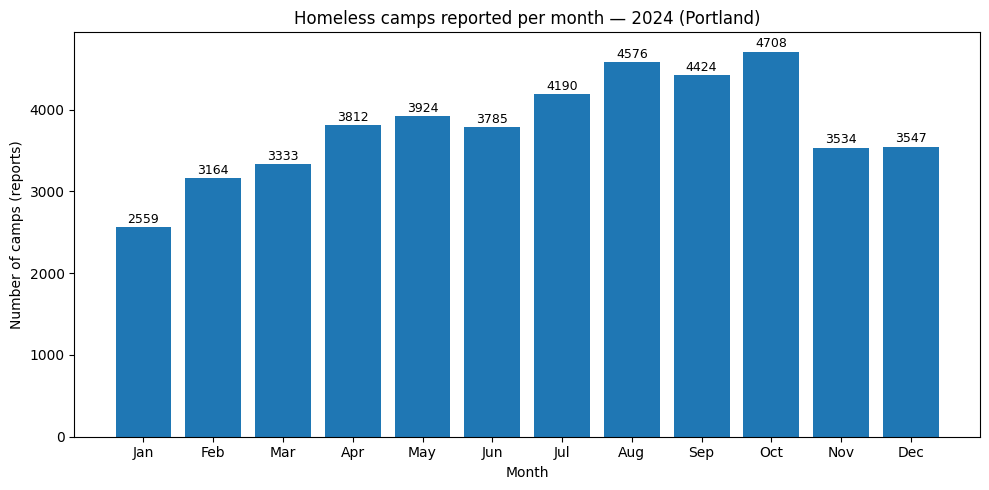

In [4]:
# plot homeless camps by month
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt

# --- Load (edit path as needed) ---
#csv_path = r"C:\path\to\IRP_Campsite_Reports_latlong-hood-zips-2024.csv"
#df = pd.read_csv(csv_path, dtype=str, engine="python")

# --- Normalize the 'month' column to numbers 1..12 ---
# Find the month column (case-insensitive exact match preferred)
month_col = next((c for c in df.columns if c.lower() == "month"), None)
if month_col is None:
    raise KeyError("Could not find a 'month' column in the CSV.")

month_map = {
    "jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6,
    "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12
}

s = df[month_col].astype(str).str.strip()
# Try numeric first; fall back to 3-letter month names
m_num = pd.to_numeric(s, errors="coerce")
m_num = m_num.where(m_num.between(1, 12), s.str[:3].str.lower().map(month_map))
m_num = pd.to_numeric(m_num, errors="coerce")

# Keep valid months only
m_num = m_num[m_num.between(1, 12)]

# --- Count per month (ensure all months shown) ---
#counts = m_num.value_counts().sort_index()
#counts = counts.reindex(range(1, 13), fill_value=0)
counts = pd.to_numeric(df["month"], errors="coerce").dropna().astype(int).value_counts().sort_index()


month_labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
summary = pd.DataFrame({"month": month_labels, "camps": counts.values.astype(int)})

# --- Plot ---
plt.figure(figsize=(10, 5))
plt.bar(summary["month"], summary["camps"])
plt.title("Homeless camps reported per month — 2024 (Portland)")
plt.xlabel("Month")
plt.ylabel("Number of camps (reports)")

# Optional: annotate bars with counts
for x, y in zip(summary["month"], summary["camps"]):
    plt.annotate(f"{y}", (x, y), xytext=(0, 3), textcoords="offset points", ha="center", fontsize=9)

plt.tight_layout()
plt.show()

# Optional: save the summary table
# summary.to_csv(r"C:\path\to\camps_per_month_2024_from_month_col.csv", index=False)


let's sort the months by most camps to least


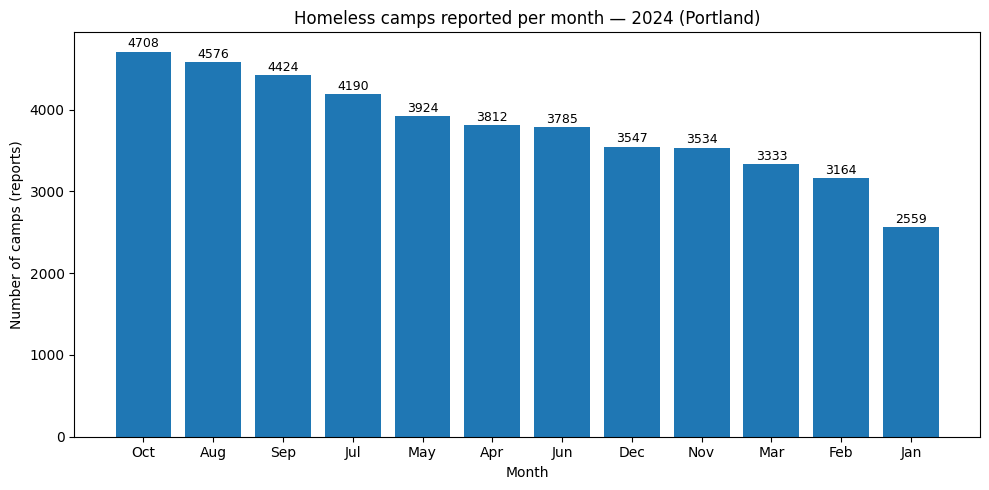

In [5]:
print("let's sort the months by most camps to least")
# plot homeless camps by month (sorted by count desc)

#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt

# --- Load (edit path as needed) ---
# csv_path = r"C:\path\to\IRP_Campsite_Reports_latlong-hood-zips-2024.csv"
# df = pd.read_csv(csv_path, dtype=str, engine="python")

# --- Normalize the 'month' column to numbers 1..12 ---
month_col = next((c for c in df.columns if c.lower() == "month"), None)
if month_col is None:
    raise KeyError("Could not find a 'month' column in the CSV.")

month_map = {
    "jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6,
    "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12
}

s = df[month_col].astype(str).str.strip()
# numeric first, then 3-letter names
m_num = pd.to_numeric(s, errors="coerce")
bad = ~m_num.between(1, 12)
m_num[bad] = s[bad].str[:3].str.lower().map(month_map)
m_num = pd.to_numeric(m_num, errors="coerce")

# keep valid months only
m_num = m_num[m_num.between(1, 12)]

# --- Count per month (include all months, then sort by count desc) ---
counts = m_num.value_counts().reindex(range(1, 13), fill_value=0).astype(int)

month_labels_map = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",
                    7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}

summary = (
    pd.DataFrame({"month_num": range(1,13)})
      .assign(month=lambda d: d["month_num"].map(month_labels_map),
              camps=lambda d: d["month_num"].map(counts).astype(int))
)

# sort by camps (desc)
summary_sorted = summary.sort_values("camps", ascending=False).reset_index(drop=True)

# --- Plot ---
plt.figure(figsize=(10, 5))
plt.bar(summary_sorted["month"], summary_sorted["camps"])
plt.title("Homeless camps reported per month — 2024 (Portland)")
plt.xlabel("Month")
plt.ylabel("Number of camps (reports)")

# annotate bars
for x, y in zip(summary_sorted["month"], summary_sorted["camps"]):
    plt.annotate(f"{y}", (x, y), xytext=(0, 3),
                 textcoords="offset points", ha="center", fontsize=9)

plt.tight_layout()
plt.show()

# Optional: save the sorted table
# summary_sorted.to_csv(r"C:\path\to\camps_per_month_2024_sorted.csv", index=False)


per day (with 14-day trend) + anomaly flagsSee seasonality, spikes, and quiet periods.


C:\Users\steph\AppData\Local\Temp\ipykernel_28856\3692359957.py:19: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  parsed = pd.to_datetime(df[c], errors="coerce", infer_datetime_format=True)
C:\Users\steph\AppData\Local\Temp\ipykernel_28856\3692359957.py:19: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  parsed = pd.to_datetime(df[c], errors="coerce", infer_datetime_format=True)
C:\Users\steph\AppData\Local\Temp\ipykernel_28856\3692359957.py:19: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict 

Using date column: inc_date_create


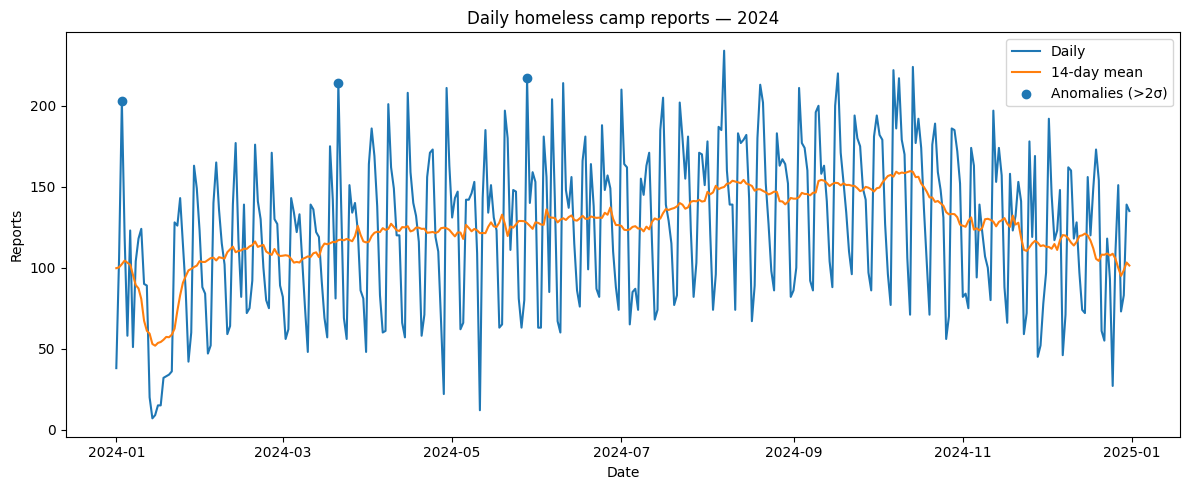

In [8]:
#import pandas as pd, numpy as np, matplotlib.pyplot as plt
print("per day (with 14-day trend) + anomaly flagsSee seasonality, spikes, and quiet periods.")

# Daily camps with 14-day trend + anomaly flags (auto-detect date column)

# df = pd.read_csv("IRP_Campsite_Reports_latlong-hood-zips-2024.csv", dtype=str)

def detect_datetime_column(df: pd.DataFrame) -> str:
    """
    Pick the column that parses to the most valid datetimes.
    Prefers names containing common date/time terms.
    """
    prefs = ("date", "time", "reported", "created", "opened", "logged")
    preferred = [c for c in df.columns if any(k in c.lower() for k in prefs)]
    others = [c for c in df.columns if c not in preferred]
    scores = []
    for c in preferred + others:
        try:
            parsed = pd.to_datetime(df[c], errors="coerce", infer_datetime_format=True)
            scores.append((c, parsed.notna().sum()))
        except Exception:
            continue
    if not scores or max(s[1] for s in scores) == 0:
        raise KeyError("Could not detect a usable date/time column.")
    best = max(scores, key=lambda t: t[1])[0]
    return best

# 1) Detect & parse
date_col = detect_datetime_column(df)
dt = pd.to_datetime(df[date_col], errors="coerce", infer_datetime_format=True)
print(f"Using date column: {date_col}")

# 2) Keep 2024 only
mask_2024 = dt.dt.year == 2024
dt_2024 = dt[mask_2024]

# 3) Daily counts, 14-day rolling mean, simple anomaly flag (>2σ from trend)
daily = dt_2024.dt.floor("D").value_counts().sort_index()
trend = daily.rolling(14, center=True, min_periods=1).mean()
resid = daily - trend
z = (resid - resid.mean()) / (resid.std(ddof=0) if resid.std(ddof=0) else 1)
anoms = daily[z > 2]

# 4) Plot
plt.figure(figsize=(12, 5))
plt.plot(daily.index, daily.values, label="Daily")
plt.plot(trend.index, trend.values, label="14-day mean")
if not anoms.empty:
    plt.scatter(anoms.index, anoms.values, marker="o", label="Anomalies (>2σ)")

plt.title("Daily homeless camp reports — 2024")
plt.xlabel("Date")
plt.ylabel("Reports")
plt.legend()
plt.tight_layout()
plt.show()



Day-of-week pattern. Are certain weekdays heavier?


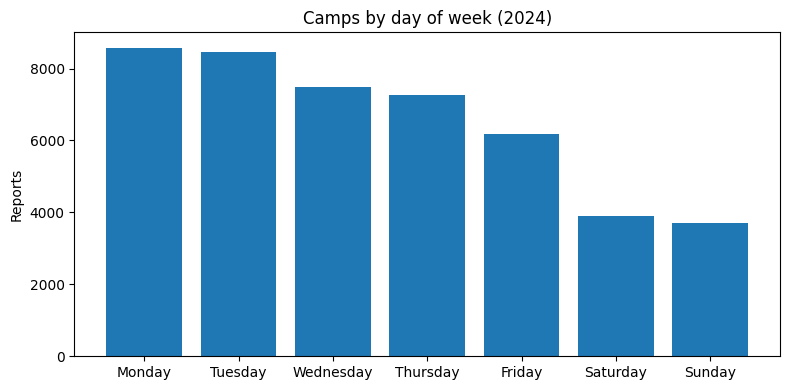

In [9]:
print("Day-of-week pattern. Are certain weekdays heavier?")

dow = dt.dt.day_name()
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
counts = dow.value_counts().reindex(order, fill_value=0)
plt.figure(figsize=(8,4)); plt.bar(counts.index, counts.values)
plt.title("Camps by day of week (2024)"); plt.ylabel("Reports"); plt.tight_layout(); plt.show()


Neighborhood × month heatmap. Which neighborhoods light up in which months?


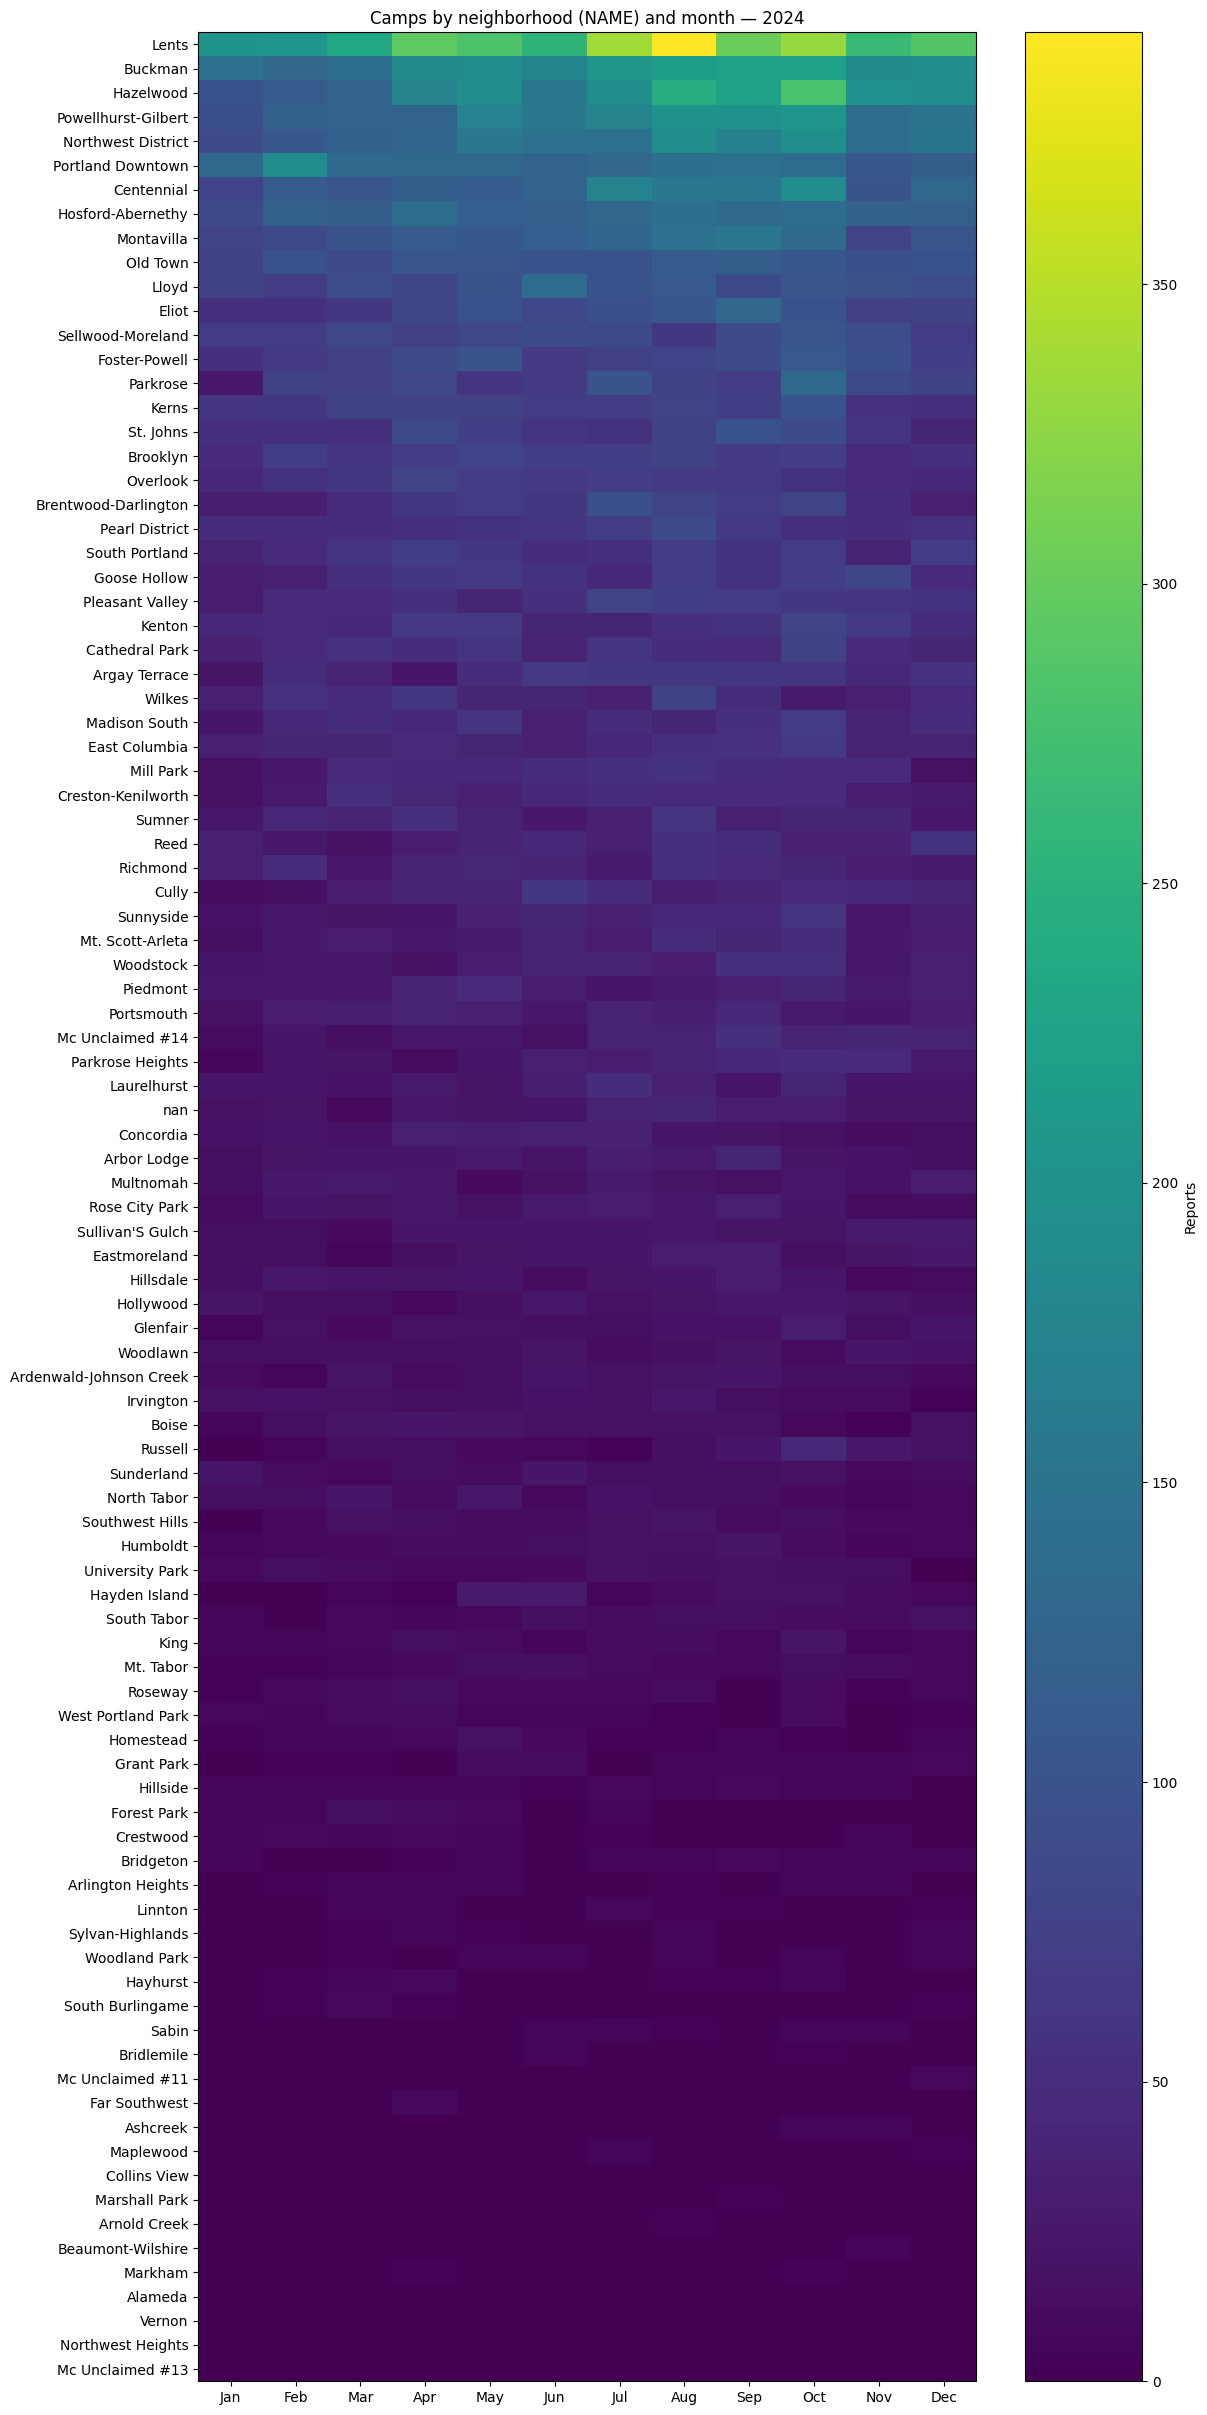

In [11]:
print("Neighborhood × month heatmap. Which neighborhoods light up in which months?")
# assume 'neighborhood' and 'month' columns exist

#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt

# Assume df already loaded and has columns: NAME, month
m = pd.to_numeric(df["month"], errors="coerce")

tbl = (
    df.assign(month=m, NAME=df["NAME"].astype(str).str.strip())
      .dropna(subset=["NAME", "month"])
      .groupby(["NAME", "month"]).size()
      .unstack(fill_value=0)
      .reindex(columns=range(1, 13), fill_value=0)
)

# Sort neighborhoods by total reports (descending)
tbl = tbl.loc[tbl.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(12, max(6, 0.25 * len(tbl))))
plt.imshow(tbl, aspect="auto")
plt.yticks(range(len(tbl.index)), tbl.index)
plt.xticks(range(12), ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.title("Camps by neighborhood (NAME) and month — 2024")
plt.colorbar(label="Reports")
plt.tight_layout()
plt.show()


Spatial density (if you have lat/lon) Hotspots without needing polygons.


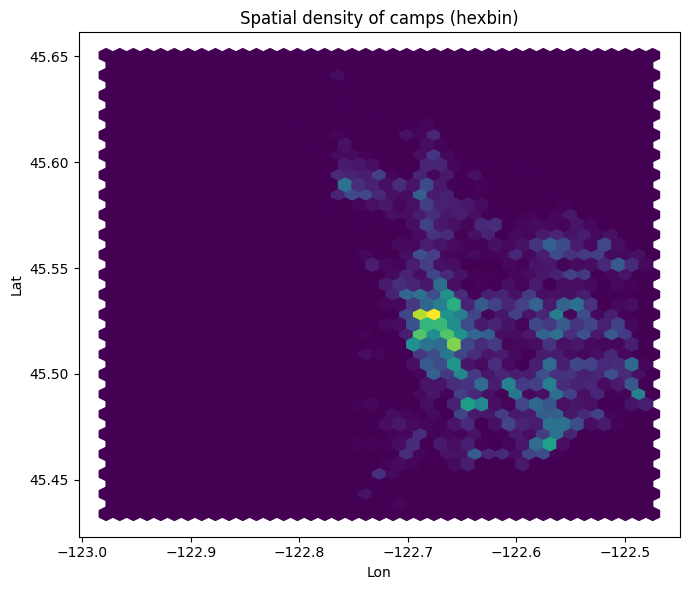

In [13]:
print("Spatial density (if you have lat/lon) Hotspots without needing polygons.")
#import numpy as np
x = pd.to_numeric(df["longitude"], errors="coerce")
y = pd.to_numeric(df["latitude"], errors="coerce")
mask = x.notna() & y.notna()
plt.figure(figsize=(7,6))
plt.hexbin(x[mask], y[mask], gridsize=40)  # density map
plt.title("Spatial density of camps (hexbin)"); plt.xlabel("Lon"); plt.ylabel("Lat")
plt.tight_layout(); plt.show()


In [17]:
# ignore that stuff below

In [16]:
print("Ok, now let's also load our resources data into another dataframe and use them both")
# --- INPUT PATHS (edit as needed) ---
resources_path = Path("C:/Users/Steph/local/OIT-class/project-files/datasets/processed/resources_by_hood_with_homeless_camps-csv.csv")  # one row per neighborhood, resource columns
df_start = pd.read_csv(orig_path, dtype=str, engine="python")

# df = pd.read_csv("resources_by_hood_with_homeless_camps.csv")
df_resources = df_start.copy()
df_resources.columns = df.columns.str.strip()
print("data loaded into df_resources")

# --- Start from your loaded df_resources ---
df_plot = df_resources.copy()
df_plot.columns = df_plot.columns.str.strip()  # remove leading/trailing spaces

def pick_col(df, candidates, required=True, label=""):
    """
    Return the first matching column from candidates.
    Matching is case-insensitive and ignores spaces/underscores/dashes.
    """
    norm = lambda s: s.lower().replace(" ", "").replace("_", "").replace("-", "")
    cols_norm = {norm(c): c for c in df.columns}
    for cand in candidates:
        if norm(cand) in cols_norm:
            return cols_norm[norm(cand)]
    # try fuzzy-ish contains match
    for c in df.columns:
        if any(norm(tok) in norm(c) for tok in candidates):
            return c
    if required:
        raise KeyError(f"Could not find a column for {label or candidates[0]}. "
                       f"Available columns: {list(df.columns)}")
    return None

# Try to find the needed columns
name_col = pick_col(df_plot,
                    ["neighborhood", "name", "neighborhood_name", "NAME"],
                    required=False, label="neighborhood/name") or "neighborhood"

camps_col = pick_col(df_plot,
                     ["homeless_camps", "campreports", "camps", "homelesscamp", "homeless camps",
                      "homeless_camps_x", "homeless_camps_y"],
                     label="homeless camps")

resources_col = pick_col(df_plot,
                         ["final_resource_calc", "finalresources", "totalresources", "resources_total"],
                         label="final resources")

# Coerce to numeric
df_plot[camps_col] = pd.to_numeric(df_plot[camps_col], errors="coerce")
df_plot[resources_col] = pd.to_numeric(df_plot[resources_col], errors="coerce")

# Drop rows missing either x or y
df_plot = df_plot.dropna(subset=[camps_col, resources_col]).copy()

x = df_plot[camps_col]
y = df_plot[resources_col]
medx, medy = x.median(), y.median()

plt.figure(figsize=(10, 7))
plt.scatter(x, y)
plt.axvline(medx); plt.axhline(medy)

plt.title("Need vs resources by neighborhood")
plt.xlabel("Homeless camps")
plt.ylabel("Total resources")

# Optional: label each point with neighborhood/name if available
if name_col in df_plot.columns:
    for xi, yi, lab in zip(x, y, df_plot[name_col].astype(str)):
        plt.annotate(lab, (xi, yi), xytext=(3, 3), textcoords="offset points", fontsize=8)

plt.tight_layout()
plt.show()

print(f"Used columns → camps: '{camps_col}', resources: '{resources_col}', name: '{name_col}'")


Ok, now let's also load our resources data into another dataframe and use them both
data loaded into df_resources


KeyError: "Could not find a column for homeless camps. Available columns: ['X', 'Y', 'OBJECTID', 'inc_date_create', 'inc_id', 'duplicate', 'item_date_create', 'IS_VEHICLE', 'report_id', 'latitude', 'longitude', 'zip_code', 'NAME', 'year', 'month']"